In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging
logging.basicConfig(level=logging.INFO)

In [3]:
import json

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from gzreduction.vote_sources.panoptes_exports import export_to_responses
from gzreduction.vote_sources.panoptes_exports import aggregate
from gzreduction.schemas.euclid_schema import euclid_schema

In [4]:
# import niceplots

# niceplots.initPlot()


In [5]:

schema = euclid_schema
# schema = euclid_ortho_schema

In [6]:
date_str = '2025_04_17'

In [7]:
# classification_export_loc = '/home/walml/repos/gz-panoptes-reduction/data/euclid/euclid-development-classifications_' + date_str + '.csv'
# aggregated_loc = '/home/walml/repos/gz-panoptes-reduction/data/euclid/euclid_development_reduced_votes_' + date_str + '.csv'

classification_export_loc = '/home/walml/repos/gz-panoptes-reduction/data/euclid/euclid-challenge-classifications_' + date_str + '.csv'
aggregated_loc = '/home/walml/repos/gz-panoptes-reduction/data/euclid/euclid_challenge_reduced_votes_' + date_str + '.csv'
# aggregated_loc = '/home/walml/repos/gz-panoptes-reduction/data/euclid/euclid_challenge_reduced_votes_' + date_str + '_after_user_removal.csv'

In [8]:
# nrows = 10000
nrows = None
clf = pd.read_csv(classification_export_loc, nrows=nrows)
clf

,classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,metadata,annotations,subject_data,subject_ids
0,575637319,MikeWalmsley,290475.0,ad01a866ccb0d6834477,27100,Euclid Challenge,1.1,2024-08-01 12:31:20 UTC,NaN,NaN,"{""source"":""api"",""session"":""bb29dd0cbc265ed2c59...","[{""task"":""T0"",""task_label"":""Is the galaxy simp...","{""101103135"":{""retired"":{""id"":131273171,""workf...",101103135
1,575637443,MikeWalmsley,290475.0,ad01a866ccb0d6834477,27100,Euclid Challenge,1.1,2024-08-01 12:33:05 UTC,NaN,NaN,"{""source"":""api"",""session"":""bb29dd0cbc265ed2c59...","[{""task"":""T0"",""task_label"":""Is the galaxy simp...","{""101101075"":{""retired"":{""id"":131273208,""workf...",101101075
2,575637955,unravel,2403423.0,22992ec9c608bc24f69b,27100,Euclid Challenge,1.1,2024-08-01 12:38:36 UTC,NaN,NaN,"{""source"":""api"",""session"":""6b06594340d3b205cdd...","[{""task"":""T0"",""task_label"":""Is the galaxy simp...","{""101093977"":{""retired"":{""id"":131273284,""workf...",101093977
3,575638057,unravel,2403423.0,22992ec9c608bc24f69b,27100,Euclid Challenge,1.1,2024-08-01 12:39:45 UTC,NaN,NaN,"{""source"":""api"",""session"":""6b06594340d3b205cdd...","[{""task"":""T0"",""task_label"":""Is the galaxy simp...","{""101091891"":{""retired"":{""id"":131273307,""workf...",101091891
4,575640326,not-logged-in-005c57be166317e1f905,NaN,005c57be166317e1f905,27100,Euclid Challenge,1.1,2024-08-01 12:55:02 UTC,NaN,NaN,"{""source"":""api"",""session"":""399725f27fd2dd1f611...","[{""task"":""T0"",""task_label"":""Is the galaxy simp...","{""101086153"":{""retired"":{""id"":131273544,""workf...",101086153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046419,625861632,Loraccarol,842168.0,b6659d5fe0f58fe91c79,27100,Euclid Challenge,1.1,2025-03-26 15:57:19 UTC,NaN,NaN,"{""source"":""api"",""session"":""9422d934230d52b036a...","[{""task"":""T0"",""task_label"":""Is the galaxy simp...","{""101518531"":{""retired"":null,""!filename"":""62e7...",101518531
1046420,627520987,Plejaden,2082107.0,cfc40311325d368fd587,27100,Euclid Challenge,1.1,2025-04-02 09:48:04 UTC,NaN,NaN,"{""source"":""api"",""session"":""04fc7a92478c59d3faf...","[{""task"":""T0"",""task_label"":""Is the galaxy simp...","{""101519023"":{""retired"":null,""!filename"":""77c3...",101519023
1046421,627521019,Plejaden,2082107.0,cfc40311325d368fd587,27100,Euclid Challenge,1.1,2025-04-02 09:48:20 UTC,NaN,NaN,"{""source"":""api"",""session"":""04fc7a92478c59d3faf...","[{""task"":""T0"",""task_label"":""Is the galaxy simp...","{""101518414"":{""retired"":null,""!filename"":""6f3c...",101518414
1046422,627521051,Plejaden,2082107.0,cfc40311325d368fd587,27100,Euclid Challenge,1.1,2025-04-02 09:48:40 UTC,NaN,NaN,"{""source"":""api"",""session"":""04fc7a92478c59d3faf...","[{""task"":""T0"",""task_label"":""Is the galaxy simp...","{""101517359"":{""retired"":null,""!filename"":""d7dd...",101517359


In [9]:
clf.groupby('user_name').agg('subject_ids').count().sort_values(ascending=False)

user_name
UrbanNight        21700
graham_d           9800
quallerina         9230
Carson.Graham      9043
Hikari_Gaby        8002
                  ...  
rmmayber              1
hilalctnnn            1
rm-w3kufe             1
KrishnanjanSil        1
---_---               1
Name: subject_ids, Length: 14706, dtype: int64

In [10]:
clf['user_id'] = clf['user_id'].fillna(0).astype(int).astype(str)



In [11]:

clf['user_id'] = np.where(clf['user_id'] == '0', clf['user_ip'], clf['user_id'])

In [12]:
clf['user_id']

0                        290475
1                        290475
2                       2403423
3                       2403423
4          005c57be166317e1f905
                   ...         
1046419                  842168
1046420                 2082107
1046421                 2082107
1046422                 2082107
1046423                 2082107
Name: user_id, Length: 1046424, dtype: object

In [13]:
len(clf['user_ip'].unique())

4474

In [14]:
len(clf['user_name'].unique())

14706

In [15]:
counts_per = clf['user_name'].value_counts()[:40]

(0.0, 15440.25)

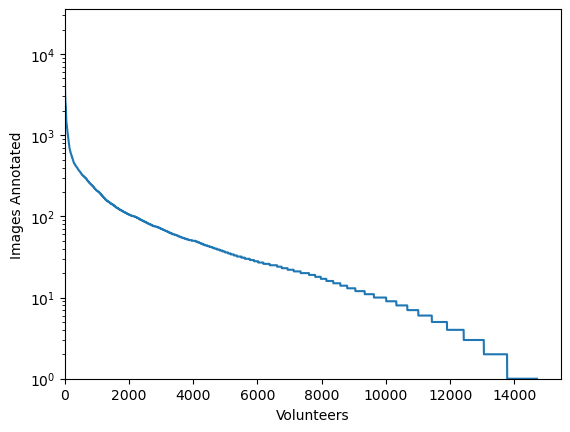

In [16]:

plt.plot(clf['user_name'].value_counts().sort_values(ascending=False).values)
plt.yscale('log')
plt.xlabel('Volunteers')
plt.ylabel('Images Annotated')
plt.ylim(1, None)
plt.xlim([0., None])

In [17]:


# pareto(1.1).pdf(0.95)


In [18]:
# clf['user_name'].value_counts()

In [19]:
y = clf['user_name'].value_counts().sort_values(ascending=False).cumsum().values
y_inv = y.max() - y
y_small = y_inv / y_inv.max()

x = 1+np.arange(len(y))
# x_small = x 

def pareto(x, b, location=0, scale=1):
    return b * scale**b / (x + location)**(b+1)

from scipy.optimize import minimize

func = lambda x0: np.sum((pareto(x, *x0) - y_small)**2)
x0 = [1.1, 0, 1]

res = minimize(func, x0)

res

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 3.5405258227039913
        x: [ 3.617e+00  9.344e+03  7.590e+04]
      nit: 41
      jac: [ 1.528e-03  3.549e-05 -4.262e-06]
 hess_inv: [[ 2.592e-04  3.378e+00  2.804e+01]
            [ 3.378e+00  1.199e+05  9.964e+05]
            [ 2.804e+01  9.964e+05  8.282e+06]]
     nfev: 384
     njev: 93

4.0 3.0
3.62


(0.0, 1097660.2)

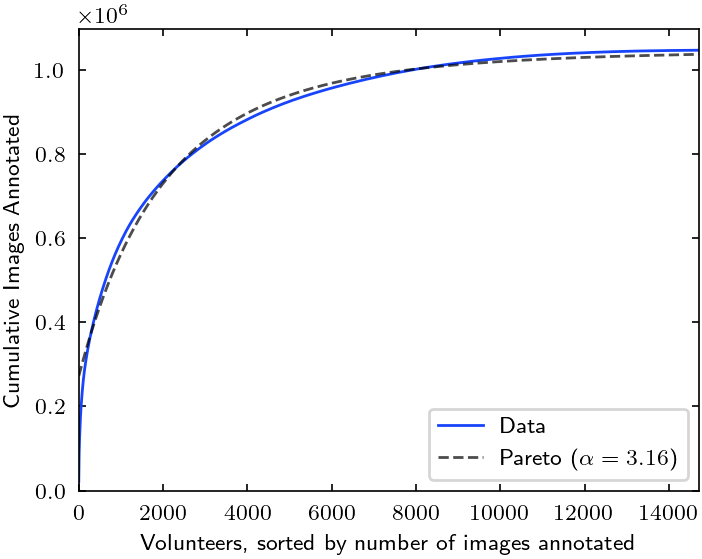

In [ ]:
# import niceplots.utils as nicepl
# nicepl.initPlot()
# fw, fh = plt.rcParams['figure.figsize']
# fig, ax = plt.subplots(figsize=(fw, fh))
# print(fw, fh)

y_small_hat = pareto(x, *res.x)
# plt.plot(x_small, y_small, label='Data')
# plt.plot(x_small, y_small_hat, label='Pareto Fit')

plt.plot(x, y, label='Data')
b_str = '{:.2f}'.format(res.x[0])
print(b_str)
plt.plot(x, y.max() - (y_small_hat * y_inv.max()), label='Pareto (' + r'$\alpha=3.16$' + ')', color='k', linestyle='--', alpha=.7)


plt.legend(loc='lower right')
plt.xlabel('Volunteers, sorted by number of images annotated')
plt.ylabel('Cumulative Images Annotated')
plt.xlim([0., None])
plt.ylim([0., None])
# plt.savefig('pareto.pdf', dpi=300, bbox_inches='tight')

In [21]:


# # def custom_optimizer(func, x0, args=(), disp=0):



# #     if res.success:

# #         return res.x

# #     raise RuntimeError('optimization routine failed')

# # a1, b1, loc1, scale1 = beta.fit(x, method="MLE", optimizer=custom_optimizer)
# from scipy.stats import pareto

# b, location, scale = pareto.fit(y_inv/y_inv.max(), floc=0, fscale=1)
# print(b, location, scale)
# # y_hat = pareto.pdf(x, b, location, scale)
# y_hat = pareto.pdf(x, b)
# plt.plot(x, y_inv)
# plt.plot(x, y_hat)

In [22]:

# x = np.linspace(1, 10, num=1000)  # x must always be 1 to N, and N should be small
# plt.plot(x, pareto(b=1, scale=1, loc=0).pdf(x))

# # pareto.pdf(y, b) / scale with y = (x - loc) / scale

(0.0, 14705.0)

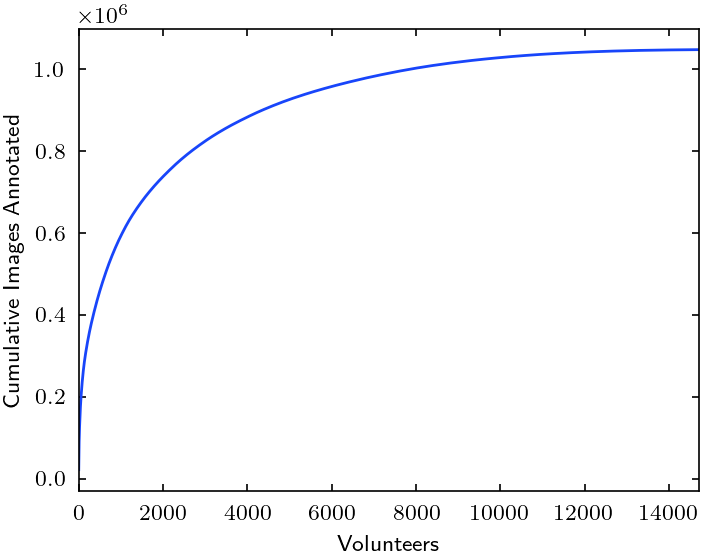

In [23]:

plt.plot(clf['user_name'].value_counts().sort_values(ascending=False).cumsum().values)
# plt.yscale('log')
plt.xlabel('Volunteers')
plt.ylabel('Cumulative Images Annotated')
plt.xlim([0., None])

In [24]:
expert_usernames = [
    'lauraleuzzi',
    'solfra',
    'Clarkguilty',
    'giulsp',
    'cmk24',
    'mhuertascompany',
    'gstevens',
    'marleau',
    'Berta_MB',
    'susan pyne',
    'helenecourtois',
    'gracca',
    'juliekatona',
    'MinaEnceladus',
    'LauraBisigello',
    'OliverMueller',
    'ThaiTran',
    'irisso',
    'antoniolamarca',
    'MikeWalmsley'
]
expert_usernames = [x.lower() for x in expert_usernames]
clf['expert'] = clf['user_name'].str.lower().isin(expert_usernames)
# clf['expert'].value_counts()
clf.query('expert').groupby('user_name')['classification_id'].count().sort_values(ascending=False)

user_name
solfra             411
ThaiTran           233
MinaEnceladus      192
antoniolamarca      86
mhuertascompany     59
OliverMueller       51
juliekatona         47
giulsp              32
helenecourtois      28
MikeWalmsley        21
irisso              12
lauraleuzzi         10
marleau             10
Berta_MB             6
cmk24                4
gstevens             3
clarkguilty          1
Name: classification_id, dtype: int64

Text(0, 0.5, 'Cum. votes by those astronomers')

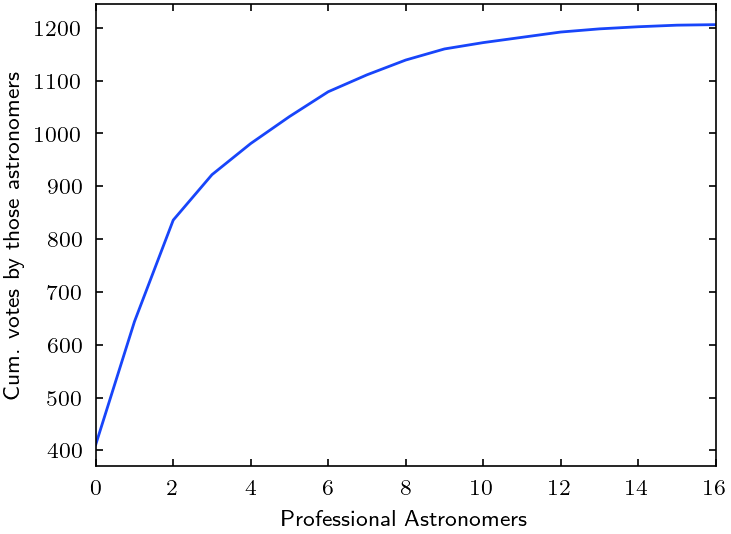

In [25]:
import matplotlib.pyplot as plt
plt.plot(clf.query('expert')['user_name'].value_counts().sort_values(ascending=False).cumsum().values)
# plt.yscale('log')
plt.xlabel('Professional Astronomers')
plt.ylabel('Cum. votes by those astronomers')
# pretty similar, maybe less extreme low count tail

In [26]:
def get_euclid_subject_id(subject_data):
    loaded = json.loads(subject_data)
    inner_dict = loaded[list(loaded.keys())[0]]
    # return inner_dict['Filename']
    return inner_dict['!filename']

In [27]:
clf['id_str'] = clf['subject_data'].apply(get_euclid_subject_id)
clf['id_str'] 

0          bb9c2a3aab7b48ac9c21b7d6c781d062342ed8f2dd4145...
1          98fe3b6effab15604e484d80ef47bb7a6cb310a2c12e11...
2          18b6d8c9f5df1c44366b2a3b5ff0b1d9b3e986dd01fb73...
3          7e9871caaeccc9e709002b24f8ff097cb47516de27f609...
4          c52a8096a07e5a8af5339408267172ebcab0041a802d28...
                                 ...                        
1046419    62e76e3b023f81b5327a82b9195670e5f73298619667e9...
1046420    77c3dbd37af827c210e5434374fe6682ede43fb3d21ecb...
1046421    6f3c4bc3ec03ced61f0deb818749575409883e471cc308...
1046422    d7dd462d59cd3f1f6a6658e58f4f40b3c0b6169d5488c9...
1046423    bac7a35efd695e630fdb584f1e9d4c6576c2c1ece432ab...
Name: id_str, Length: 1046424, dtype: object

In [28]:
clf.columns.values

array(['classification_id', 'user_name', 'user_id', 'user_ip',
       'workflow_id', 'workflow_name', 'workflow_version', 'created_at',
       'gold_standard', 'expert', 'metadata', 'annotations',
       'subject_data', 'subject_ids', 'id_str'], dtype=object)

In [29]:
len(clf)

1046424

In [30]:
# workflows = [26524]
workflows = [27100]
clf = clf[clf['workflow_id'].isin(workflows)]
assert len(clf) > 0

In [31]:
clf['created_at'] = pd.to_datetime(clf['created_at'])

In [32]:
clf_dt = clf.pivot_table(index='created_at', columns='workflow_id', values='id_str', aggfunc='count', fill_value=0)

In [33]:

clf_dt_r = clf_dt.resample('2H').sum()[27100]
clf_dt_r

created_at
2024-08-01 12:00:00+00:00     324
2024-08-01 14:00:00+00:00    3217
2024-08-01 16:00:00+00:00    3248
2024-08-01 18:00:00+00:00    3201
2024-08-01 20:00:00+00:00    3193
                             ... 
2025-04-02 00:00:00+00:00       0
2025-04-02 02:00:00+00:00       0
2025-04-02 04:00:00+00:00       0
2025-04-02 06:00:00+00:00       0
2025-04-02 08:00:00+00:00       4
Freq: 2H, Name: 27100, Length: 2927, dtype: int64

In [34]:
clf['created_at'].max() - clf['created_at'].min()

Timedelta('243 days 21:17:59')

(0.0, 24582.6)

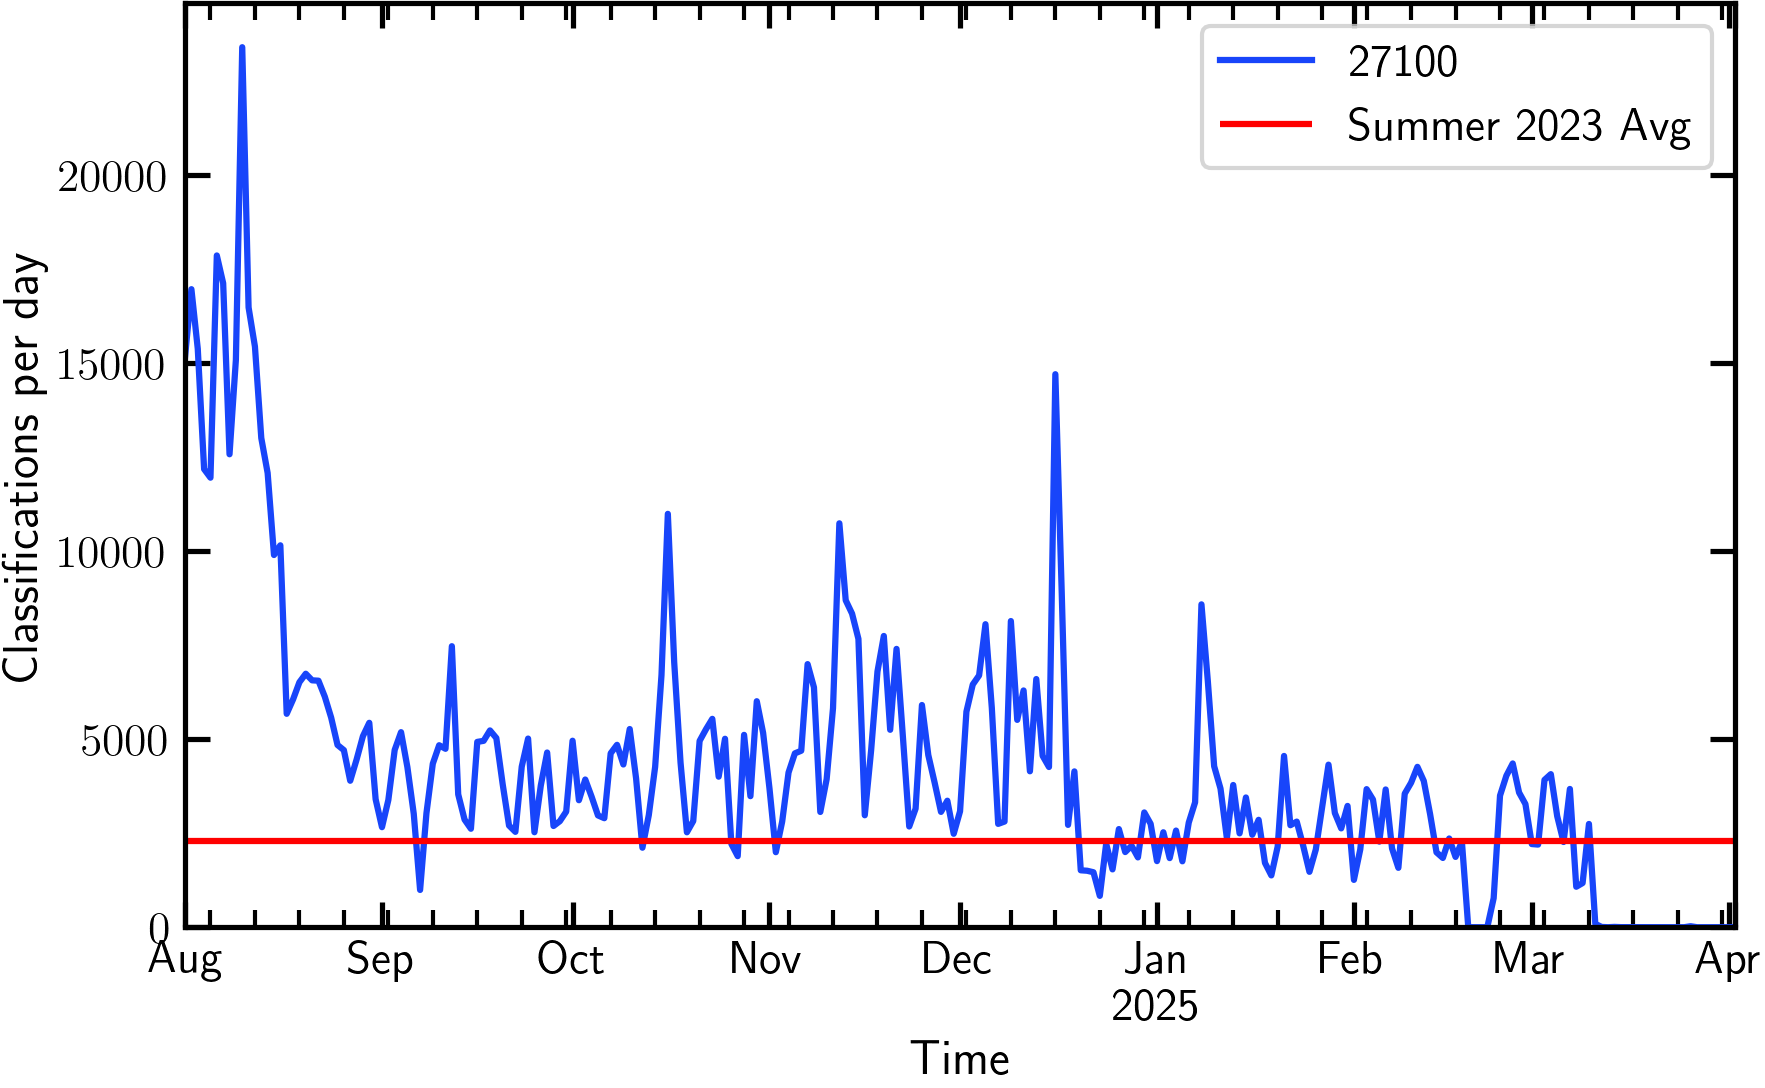

In [35]:
import seaborn as sns
sns.set_context('talk')
clf_dt_r = clf_dt.resample('1D').sum().plot(figsize=(10, 6))
# plt.plot(clf_dt_r.index, clf_dt_r.values)
plt.xlabel('Time')
plt.ylabel('Classifications per day')
# 744 hours in august
# plt.hlines(y=150000/(31*24), xmin=clf['created_at'].min(),xmax=clf['created_at'].max(), color='g', label='Aug 2022 Avg')
# plt.hlines(y=71000/(31*24), xmin=clf['created_at'].min(),xmax=clf['created_at'].max(), color='r', label='Aug 2023 Avg')
# plt.hlines(y=670, xmin=clf['created_at'].min(),xmax=clf['created_at'].max(), color='k', linestyle='--', label='Euclid Avg')
# plt.hlines(y=670, xmin=clf['created_at'].min(),xmax=clf['created_at'].max(), color='k', linestyle='--', label='Euclid Late Avg')
# plt.legend('',frameon=False)

# plt.axvline(pd.to_datetime('2024-08-01 13:00:00'), color='r', linestyle='--')
# plt.axvline(pd.to_datetime('2024-08-01 19:00:00'), color='r', linestyle='--')
plt.hlines(y=2300, xmin=clf['created_at'].min(),xmax=clf['created_at'].max(), color='r', label='Summer 2023 Avg')
plt.legend()
plt.ylim([0, None])

In [36]:
len(clf)/(7*24)

6228.714285714285

In [37]:
# clf['time_since_start'] = clf['created_at'] - clf['created_at'].min()

In [38]:
# clf['days_since_start'] = np.around(clf['time_since_start'].dt.total_seconds() / (24*3600), 1)

In [39]:
# clf_grouped = clf.groupby('days_since_start').agg({'user_name': 'count'}).reset_index()

In [40]:
clf['annotations'] = clf['annotations'].apply(json.loads)

In [41]:
# df = export_to_responses.explode_annotations(clf, exclude_tasks=['T10'])
# df

In [42]:
# plt.hist(clf['annotations'].apply(len))
clf['annotations'].isna().sum()

0

In [43]:
clf['annotations'].iloc[0]

[{'task': 'T0',
  'task_label': 'Is the galaxy simply smooth and rounded, with no sign of a disk?',
  'value': '![features_or_disk_new.png](https://panoptes-uploads.zooniverse.org/production/project_attached_image/1ec52a74-9e49-4579-91ff-0140eb5371e6.png =60x) Features or Disk'},
 {'task': 'T2',
  'task_label': 'Could this be a disk viewed edge-on?',
  'value': '![feature_or_disk.png](https://panoptes-uploads.zooniverse.org/production/project_attached_image/f353f2f1-a47e-439d-b9ca-020199162a79.png =60x) No - Something Else'},
 {'task': 'T4',
  'task_label': 'Is there a bar feature through the centre of the galaxy?',
  'value': '![bar_strong_sidebyside_acwacw_200x100.png](https://panoptes-uploads.zooniverse.org/production/project_attached_image/4b9b5758-ca37-47bd-bb24-ca0933f45d1b.png =120x60) Strong Bar'},
 {'task': 'T5',
  'task_label': 'Is there any sign of a spiral arm pattern?',
  'value': '![rounded.png](https://panoptes-uploads.zooniverse.org/production/project_attached_image/944

In [44]:
df = export_to_responses.explode_annotations(clf, exclude_tasks=None)  # now includes T10, rare features, as well
df

,task,task_label,value,id_str,user_id,classification_id,created_at,subject_ids
0,T0,"Is the galaxy simply smooth and rounded, with ...",![features_or_disk_new.png](https://panoptes-u...,bb9c2a3aab7b48ac9c21b7d6c781d062342ed8f2dd4145...,290475,575637319,2024-08-01 12:31:20+00:00,101103135
0,T2,Could this be a disk viewed edge-on?,![feature_or_disk.png](https://panoptes-upload...,bb9c2a3aab7b48ac9c21b7d6c781d062342ed8f2dd4145...,290475,575637319,2024-08-01 12:31:20+00:00,101103135
0,T4,Is there a bar feature through the centre of t...,![bar_strong_sidebyside_acwacw_200x100.png](ht...,bb9c2a3aab7b48ac9c21b7d6c781d062342ed8f2dd4145...,290475,575637319,2024-08-01 12:31:20+00:00,101103135
0,T5,Is there any sign of a spiral arm pattern?,![rounded.png](https://panoptes-uploads.zooniv...,bb9c2a3aab7b48ac9c21b7d6c781d062342ed8f2dd4145...,290475,575637319,2024-08-01 12:31:20+00:00,101103135
0,T8,"Is there a central bulge? If so, how large is ...",![bulge_icon_moderate_bulge.png](https://panop...,bb9c2a3aab7b48ac9c21b7d6c781d062342ed8f2dd4145...,290475,575637319,2024-08-01 12:31:20+00:00,101103135
...,...,...,...,...,...,...,...,...
1046423,T2,Could this be a disk viewed edge-on?,![edge_on_diskier.png](https://panoptes-upload...,bac7a35efd695e630fdb584f1e9d4c6576c2c1ece432ab...,2082107,627521122,2025-04-02 09:49:19+00:00,101517541
1046423,T3,Does the galaxy have a bulge at its centre? If...,![edge_on_no_bulge.png](https://panoptes-uploa...,bac7a35efd695e630fdb584f1e9d4c6576c2c1ece432ab...,2082107,627521122,2025-04-02 09:49:19+00:00,101517541
1046423,T13,Are there any obvious bright clumps?,![no.png](https://panoptes-uploads.zooniverse....,bac7a35efd695e630fdb584f1e9d4c6576c2c1ece432ab...,2082107,627521122,2025-04-02 09:49:19+00:00,101517541
1046423,T11,Is the galaxy merging or disturbed?,![no.png](https://panoptes-uploads.zooniverse....,bac7a35efd695e630fdb584f1e9d4c6576c2c1ece432ab...,2082107,627521122,2025-04-02 09:49:19+00:00,101517541


In [45]:
# del clf # save memory
clf = clf[['id_str', 'subject_ids']]

In [46]:
rare = df.query('task == "T10"')  # handle separately
assert len(rare) > 0
rare

,task,task_label,value,id_str,user_id,classification_id,created_at,subject_ids
0,T10,Do you see any of these rare features?,[![no.png](https://panoptes-uploads.zooniverse...,bb9c2a3aab7b48ac9c21b7d6c781d062342ed8f2dd4145...,290475,575637319,2024-08-01 12:31:20+00:00,101103135
1,T10,Do you see any of these rare features?,[![irregular.png](https://panoptes-uploads.zoo...,98fe3b6effab15604e484d80ef47bb7a6cb310a2c12e11...,290475,575637443,2024-08-01 12:33:05+00:00,101101075
2,T10,Do you see any of these rare features?,[![no.png](https://panoptes-uploads.zooniverse...,18b6d8c9f5df1c44366b2a3b5ff0b1d9b3e986dd01fb73...,2403423,575637955,2024-08-01 12:38:36+00:00,101093977
4,T10,Do you see any of these rare features?,[![overlapping.png](https://panoptes-uploads.z...,c52a8096a07e5a8af5339408267172ebcab0041a802d28...,005c57be166317e1f905,575640326,2024-08-01 12:55:02+00:00,101086153
5,T10,Do you see any of these rare features?,[![no.png](https://panoptes-uploads.zooniverse...,9cca18309a2cf193367e3f20830c7970b8b1a501b62d41...,92b32ddb829852c7b75e,575640565,2024-08-01 12:57:33+00:00,101091604
...,...,...,...,...,...,...,...,...
1046418,T10,Do you see any of these rare features?,[![no.png](https://panoptes-uploads.zooniverse...,f6c7c2cd0ff99d9a6ad9e9d87f4568fd7c2b8251f3af5a...,842168,625861354,2025-03-26 15:56:38+00:00,101518607
1046419,T10,Do you see any of these rare features?,[![no.png](https://panoptes-uploads.zooniverse...,62e76e3b023f81b5327a82b9195670e5f73298619667e9...,842168,625861632,2025-03-26 15:57:19+00:00,101518531
1046420,T10,Do you see any of these rare features?,[![no.png](https://panoptes-uploads.zooniverse...,77c3dbd37af827c210e5434374fe6682ede43fb3d21ecb...,2082107,627520987,2025-04-02 09:48:04+00:00,101519023
1046421,T10,Do you see any of these rare features?,[![no.png](https://panoptes-uploads.zooniverse...,6f3c4bc3ec03ced61f0deb818749575409883e471cc308...,2082107,627521019,2025-04-02 09:48:20+00:00,101518414


In [47]:
df = df.query('task != "T10"')

In [48]:
question = schema.get_question_from_raw_name('T0')
# question.get_answer_names()
question.get_raw_answer_names()

['smooth', 'features or disk', 'star, artifact, or bad zoom']

In [49]:
len(df)

4827464

In [50]:
# %%timeit
# cleaned = export_to_responses.clean_exploded_annotations(df.sample(100000), schema)  # takes a few minutes, well worth closing vs code and re-opening first to maximise memory
cleaned = export_to_responses.clean_exploded_annotations(df, schema)  # takes a few minutes, well worth closing vs code and re-opening first to maximise memory
len(cleaned)  # 551945 on 8th Aug, 1278819 on Aug 20th, 1564846 at end-of-August, 1996732 23rd Sept, 2.32M Oct 22nd, 2.94M 11th Nov, 3.87M 23 Dec, 4.82 final

INFO:root:initial: 4827464
/home/walml/repos/gz-panoptes-reduction/gzreduction/vote_sources/panoptes_exports/export_to_responses.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['value'] = df['value'].map(sanitise_string)
INFO:root:strings sanitised
INFO:root:after null: 4827464
INFO:root:after blank: 4827464
INFO:root:after rename: 4827464


4827464

In [51]:
cleaned

,task,value,id_str,user_id,classification_id,created_at,subject_ids
0,smooth-or-featured,featured-or-disk,bb9c2a3aab7b48ac9c21b7d6c781d062342ed8f2dd4145...,290475,575637319,2024-08-01 12:31:20+00:00,101103135
1,disk-edge-on,no,bb9c2a3aab7b48ac9c21b7d6c781d062342ed8f2dd4145...,290475,575637319,2024-08-01 12:31:20+00:00,101103135
2,bar,strong,bb9c2a3aab7b48ac9c21b7d6c781d062342ed8f2dd4145...,290475,575637319,2024-08-01 12:31:20+00:00,101103135
3,has-spiral-arms,no,bb9c2a3aab7b48ac9c21b7d6c781d062342ed8f2dd4145...,290475,575637319,2024-08-01 12:31:20+00:00,101103135
4,bulge-size,moderate,bb9c2a3aab7b48ac9c21b7d6c781d062342ed8f2dd4145...,290475,575637319,2024-08-01 12:31:20+00:00,101103135
...,...,...,...,...,...,...,...
4827459,smooth-or-featured,featured-or-disk,bac7a35efd695e630fdb584f1e9d4c6576c2c1ece432ab...,2082107,627521122,2025-04-02 09:49:19+00:00,101517541
4827460,disk-edge-on,yes,bac7a35efd695e630fdb584f1e9d4c6576c2c1ece432ab...,2082107,627521122,2025-04-02 09:49:19+00:00,101517541
4827461,edge-on-bulge,none,bac7a35efd695e630fdb584f1e9d4c6576c2c1ece432ab...,2082107,627521122,2025-04-02 09:49:19+00:00,101517541
4827462,clumps,no,bac7a35efd695e630fdb584f1e9d4c6576c2c1ece432ab...,2082107,627521122,2025-04-02 09:49:19+00:00,101517541


In [52]:
cleaned.to_parquet('/home/walml/repos/gz-panoptes-reduction/data/euclid/euclid_challenge_latest_cleaned.parquet')

# use to analyse user trends e.g. track any change in answers over time, remove problematic users

In [97]:
cleaned = pd.read_parquet('/home/walml/repos/gz-panoptes-reduction/data/euclid/euclid_challenge_latest_cleaned.parquet')

df_agg = cleaned.query('task=="smooth-or-featured"').groupby('user_id').agg({
    'value': [lambda x: (x=='smooth').mean(), lambda x: (x=='featured-or-disk').mean(), lambda x: (x=='problem').mean(), 'count'],
    'created_at': ['min', 'max'],
    'subject_ids': 'count'
    }).reset_index()


0.020943832449340404

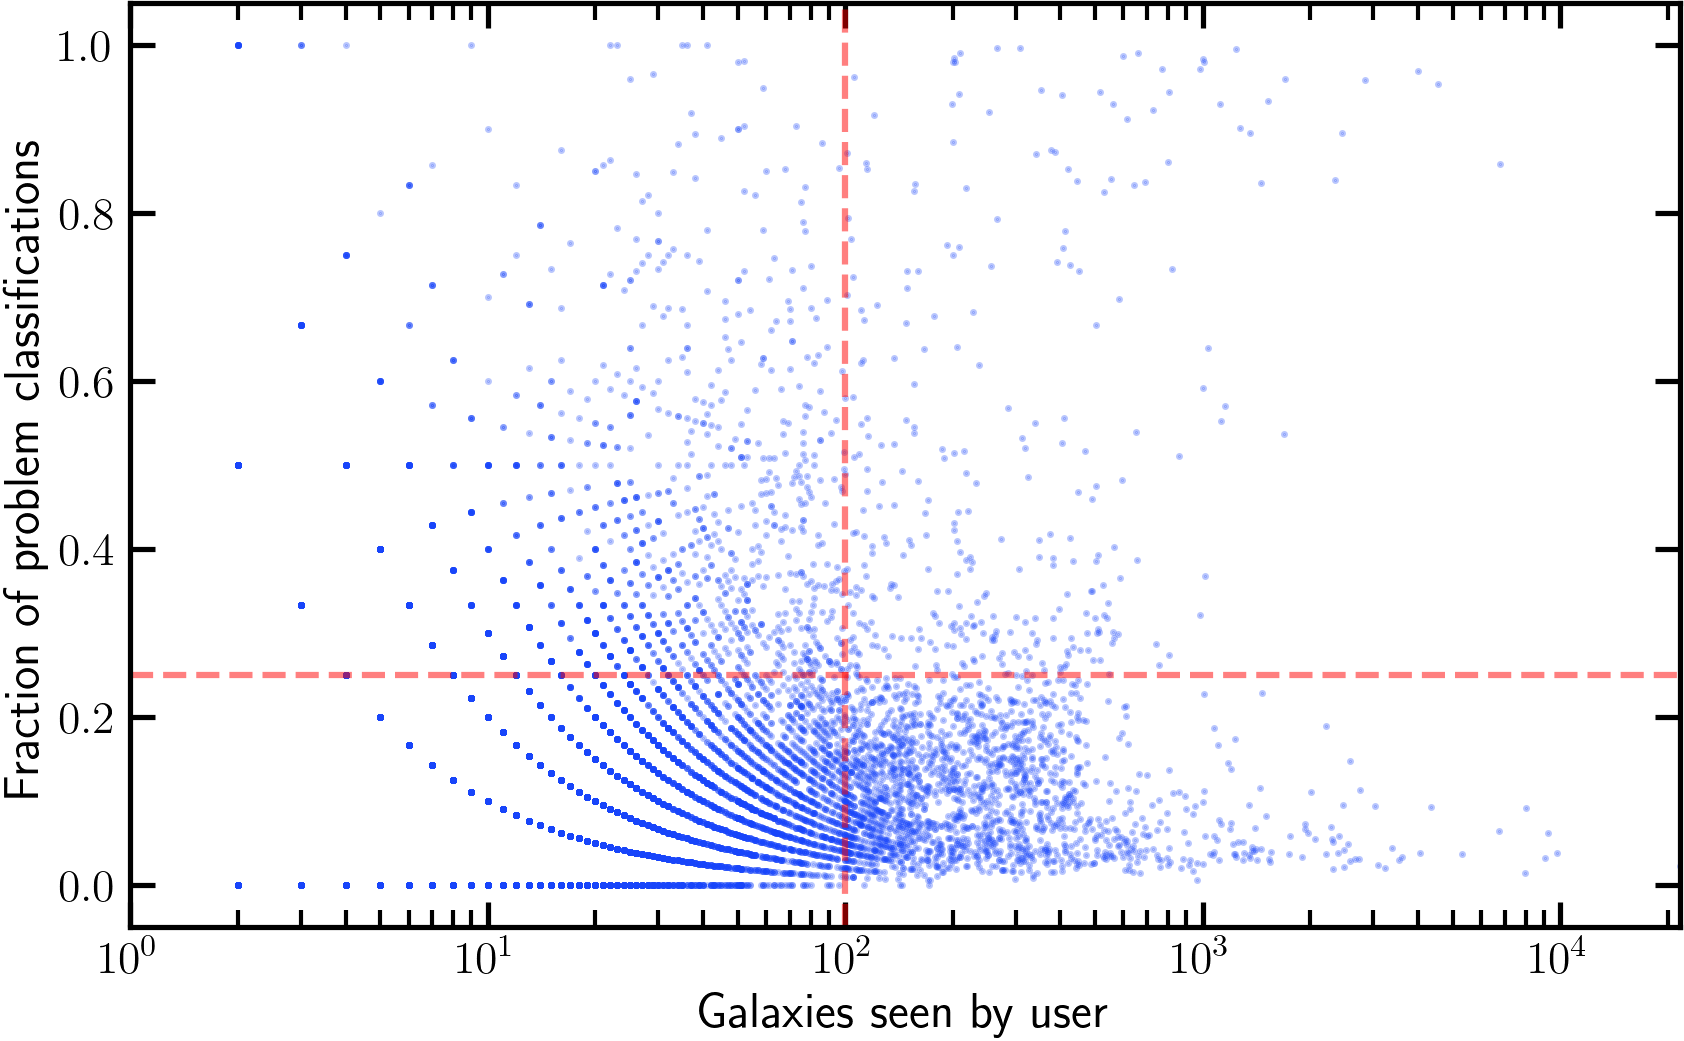

In [98]:
assert not any(cleaned['user_id'].isna())

min_count = 100
max_problem_frac = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df_agg['value']['count'], df_agg['value']['<lambda_2>'],  s=1., alpha=.3)
ax.set_xscale('log')
ax.set_xlabel('Galaxies seen by user')
ax.set_ylabel('Fraction of problem classifications')

ax.axhline(max_problem_frac, color='red', linestyle='--', alpha=.5)
ax.axvline(min_count, color='red', linestyle='--', alpha=.5)

((df_agg['value']['count'] > min_count) & (df_agg['value']['<lambda_2>'] > max_problem_frac)).mean()

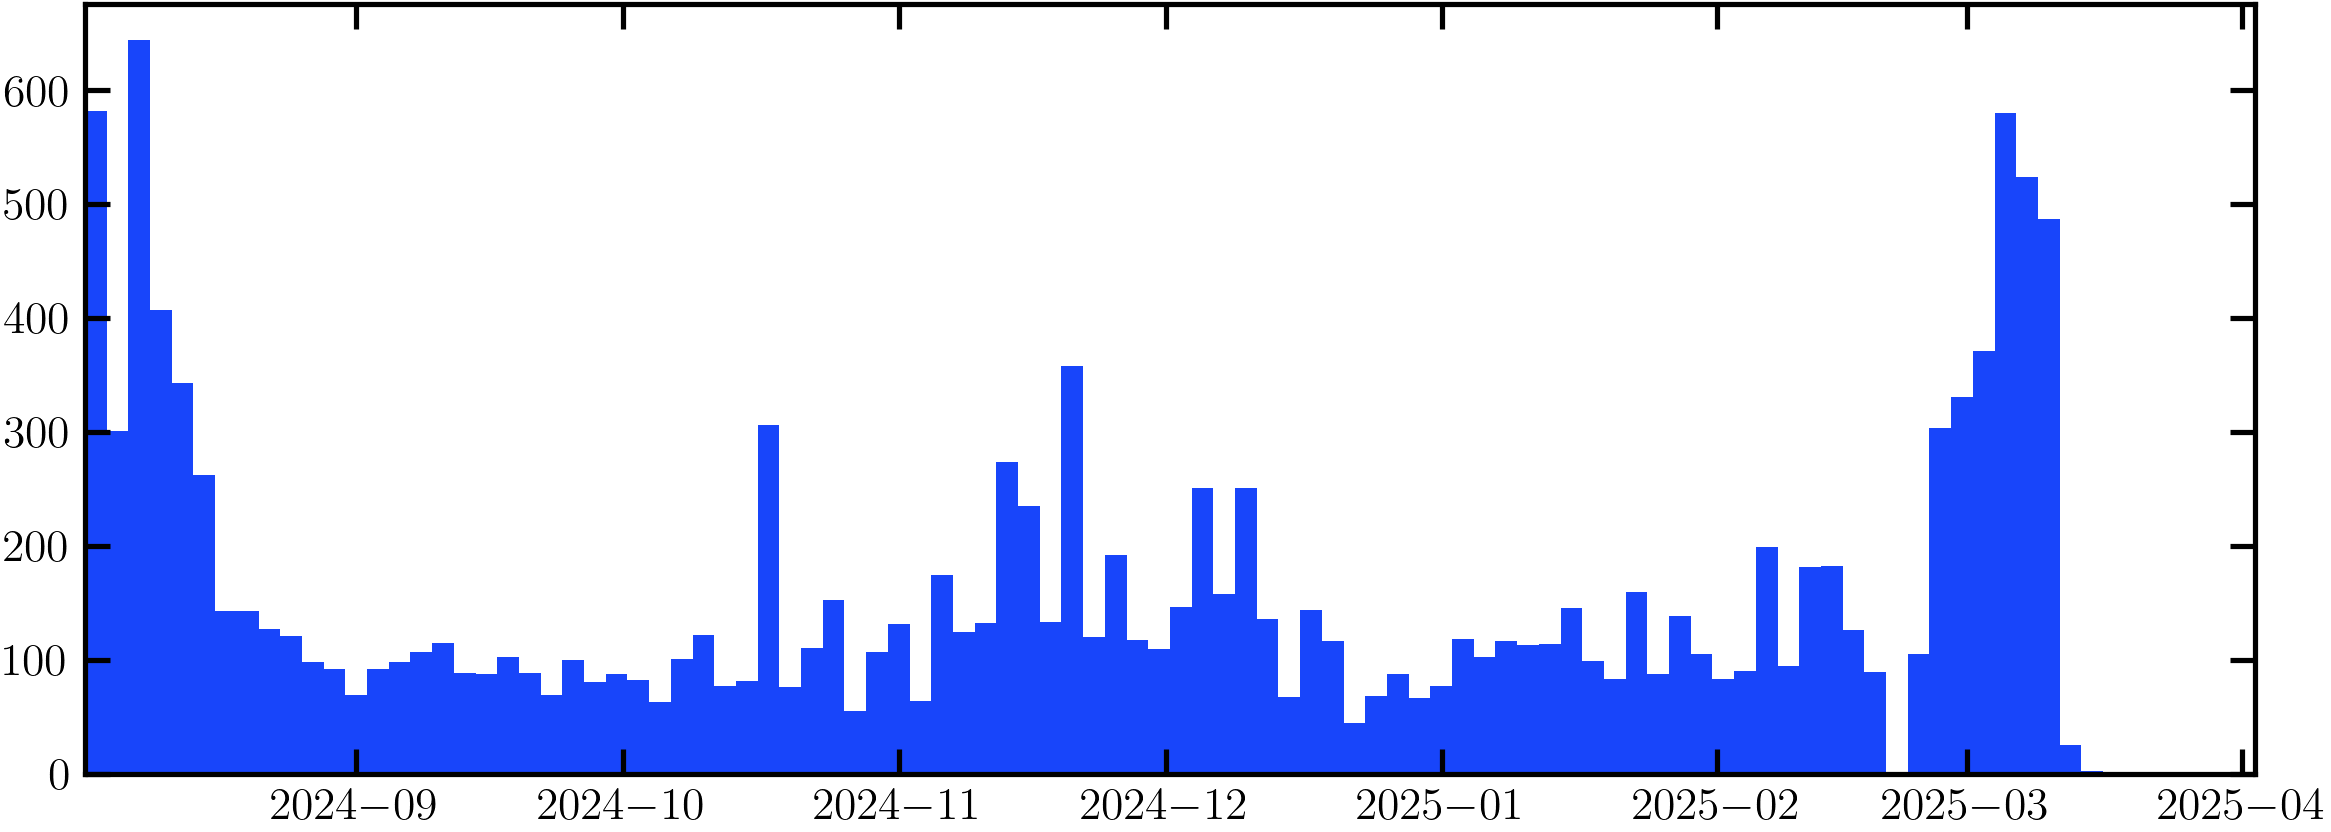

In [99]:
earliest_allowed_last_clf = pd.to_datetime('2024-08-21', utc=True)

fig, ax = plt.subplots(figsize=(14, 5))
_ = plt.hist(df_agg['created_at']['max'], bins=100)

In [100]:
users_left_too_early = df_agg[df_agg['created_at']['max'] < earliest_allowed_last_clf]['user_id']

users_answered_problem_too_often = df_agg[(df_agg['value']['count'] > min_count) & (df_agg['value']['<lambda_2>'] > max_problem_frac)]['user_id']

users_to_remove = set(users_left_too_early).union(set(users_answered_problem_too_often))
len(users_to_remove), len(set(df_agg['user_id']))

(3110, 14706)

In [101]:
cleaned

,task,value,id_str,user_id,classification_id,created_at,subject_ids
0,smooth-or-featured,featured-or-disk,bb9c2a3aab7b48ac9c21b7d6c781d062342ed8f2dd4145...,290475,575637319,2024-08-01 12:31:20+00:00,101103135
1,disk-edge-on,no,bb9c2a3aab7b48ac9c21b7d6c781d062342ed8f2dd4145...,290475,575637319,2024-08-01 12:31:20+00:00,101103135
2,bar,strong,bb9c2a3aab7b48ac9c21b7d6c781d062342ed8f2dd4145...,290475,575637319,2024-08-01 12:31:20+00:00,101103135
3,has-spiral-arms,no,bb9c2a3aab7b48ac9c21b7d6c781d062342ed8f2dd4145...,290475,575637319,2024-08-01 12:31:20+00:00,101103135
4,bulge-size,moderate,bb9c2a3aab7b48ac9c21b7d6c781d062342ed8f2dd4145...,290475,575637319,2024-08-01 12:31:20+00:00,101103135
...,...,...,...,...,...,...,...
4827459,smooth-or-featured,featured-or-disk,bac7a35efd695e630fdb584f1e9d4c6576c2c1ece432ab...,2082107,627521122,2025-04-02 09:49:19+00:00,101517541
4827460,disk-edge-on,yes,bac7a35efd695e630fdb584f1e9d4c6576c2c1ece432ab...,2082107,627521122,2025-04-02 09:49:19+00:00,101517541
4827461,edge-on-bulge,none,bac7a35efd695e630fdb584f1e9d4c6576c2c1ece432ab...,2082107,627521122,2025-04-02 09:49:19+00:00,101517541
4827462,clumps,no,bac7a35efd695e630fdb584f1e9d4c6576c2c1ece432ab...,2082107,627521122,2025-04-02 09:49:19+00:00,101517541


In [102]:
len(cleaned)

4827464

In [103]:
# also remove any annotations for test set galaxies made before december (i.e. drop the v1 test set phase)

counts_by_subject = cleaned.query('task == "smooth-or-featured"').groupby('subject_ids').agg({'created_at': 'count'}).reset_index()
test_subjects = counts_by_subject[counts_by_subject['created_at'] >= 20]['subject_ids'].unique()
# len(test_subjects)

is_test = cleaned['subject_ids'].isin(test_subjects)
is_before_dec = cleaned['created_at'] < pd.to_datetime('2024-12-01', utc=True)
cleaned = cleaned[~(is_test & is_before_dec)]
len(cleaned)

4265660

In [ ]:
# comment to disable user removal
cleaned = cleaned[~cleaned['user_id'].isin(users_to_remove)]
len(cleaned)
# bit sad to remove a third of our votes, but it might be worth it to remove the systematic bias
# hopefully I can dial this back down later

3554178

In [105]:
cleaned.to_parquet('/home/walml/repos/gz-panoptes-reduction/data/euclid/euclid_challenge_latest_cleaned_after_user_removal.parquet')

In [106]:
aggregated = aggregate.responses_to_reduced_votes(cleaned.reset_index(drop=True), schema)

/home/walml/repos/gz-panoptes-reduction/gzreduction/vote_sources/panoptes_exports/aggregate.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[question.get_fraction_column(answer)] = df[question.get_count_column(answer)] / df[question.total_votes]  # may give nans?
/home/walml/repos/gz-panoptes-reduction/gzreduction/vote_sources/panoptes_exports/aggregate.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[question.get_fraction_column(answer)] = df[question.get_count_column(answer)] / df[question.total_votes]  # may giv

In [107]:
aggregated  # 152k Dec 23rd

question_response,id_str,smooth-or-featured_smooth,smooth-or-featured_featured-or-disk,smooth-or-featured_problem,how-rounded_round,how-rounded_in-between,how-rounded_cigar-shaped,disk-edge-on_yes,disk-edge-on_no,edge-on-bulge_rounded,...,problem_artifact_fraction,problem_zoom_fraction,artifact_non-star_fraction,artifact_satellite_fraction,artifact_scattered_fraction,artifact_diffraction_fraction,artifact_ray_fraction,artifact_saturation_fraction,artifact_other_fraction,artifact_ghost_fraction
0,000025c0749f53d1109ce125cc55d436ab993c64189836...,2,3,0,0,2,0,0,3,0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,00004bc75b7f464e31bb5a9bbb348f3d453393a9b2f6cf...,0,1,3,0,0,0,1,0,0,...,1.0,0.0,0.0,0.333333,0.0,0.666667,0.0,0.0,0.0,0.0
2,0000a505e575fb99b9f1357a61eb7fa85a6358fba4e60f...,1,1,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0001f11aa1a8f96f1d21f72d03ebc113d680a99d884d71...,1,3,0,0,0,1,3,0,1,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0001f34234e796b75e3c5ecc529d2d07ef0571a522e1ba...,2,2,0,2,0,0,0,2,0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172272,fffdc840e17b15709c073c32d85228be00c8ab97591248...,1,0,4,0,1,0,0,0,0,...,1.0,0.0,0.0,0.750000,0.0,0.250000,0.0,0.0,0.0,0.0
172273,fffe5be14688312bb37c33083b5c558fab29e043a6cb1a...,0,2,0,0,0,0,0,2,0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
172274,fffea0097b1f56d485fba0d9f82ca9b7518c50ac387986...,0,5,0,0,0,0,0,5,0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
172275,ffff515b519b3e4cce85131e20d33aa955bfcda496c9b5...,2,1,0,2,0,0,0,1,0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [108]:
# merge in subject id

aggregated = aggregated.merge(clf[['id_str', 'subject_ids']].drop_duplicates(), on='id_str', how='left')
aggregated = aggregated.rename(columns={'subject_ids': 'subject_id'})

In [109]:
aggregated

,id_str,smooth-or-featured_smooth,smooth-or-featured_featured-or-disk,smooth-or-featured_problem,how-rounded_round,how-rounded_in-between,how-rounded_cigar-shaped,disk-edge-on_yes,disk-edge-on_no,edge-on-bulge_rounded,...,problem_zoom_fraction,artifact_non-star_fraction,artifact_satellite_fraction,artifact_scattered_fraction,artifact_diffraction_fraction,artifact_ray_fraction,artifact_saturation_fraction,artifact_other_fraction,artifact_ghost_fraction,subject_id
0,000025c0749f53d1109ce125cc55d436ab993c64189836...,2,3,0,0,2,0,0,3,0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,101552209
1,00004bc75b7f464e31bb5a9bbb348f3d453393a9b2f6cf...,0,1,3,0,0,0,1,0,0,...,0.0,0.0,0.333333,0.0,0.666667,0.0,0.0,0.0,0.0,101564291
2,0000a505e575fb99b9f1357a61eb7fa85a6358fba4e60f...,1,1,0,1,0,0,0,1,0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,101084770
3,0001f11aa1a8f96f1d21f72d03ebc113d680a99d884d71...,1,3,0,0,0,1,3,0,1,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,101719490
4,0001f34234e796b75e3c5ecc529d2d07ef0571a522e1ba...,2,2,0,2,0,0,0,2,0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,101672698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172272,fffdc840e17b15709c073c32d85228be00c8ab97591248...,1,0,4,0,1,0,0,0,0,...,0.0,0.0,0.750000,0.0,0.250000,0.0,0.0,0.0,0.0,101736077
172273,fffe5be14688312bb37c33083b5c558fab29e043a6cb1a...,0,2,0,0,0,0,0,2,0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,101084827
172274,fffea0097b1f56d485fba0d9f82ca9b7518c50ac387986...,0,5,0,0,0,0,0,5,0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,101606321
172275,ffff515b519b3e4cce85131e20d33aa955bfcda496c9b5...,2,1,0,2,0,0,0,1,0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,101117763


In [110]:
aggregated.to_csv(aggregated_loc, index=False)

In [111]:
aggregated['smooth-or-featured_total-votes'].sum()

746807

<Axes: >

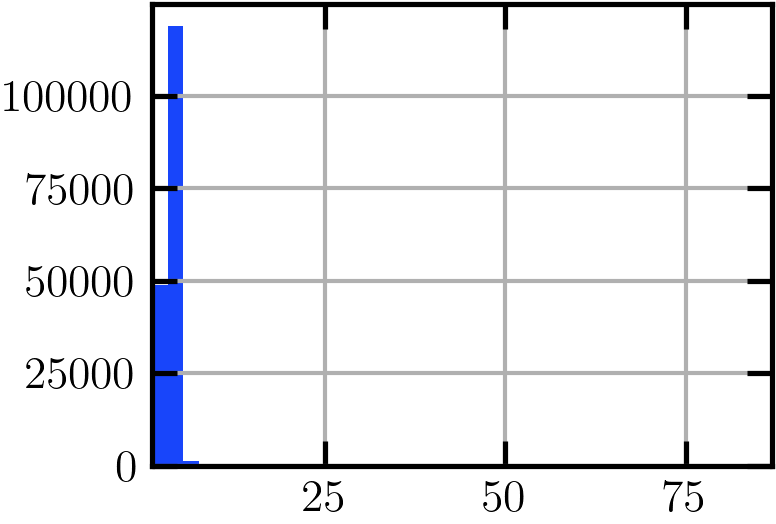

In [112]:
aggregated['smooth-or-featured_total-votes'].hist(bins=40)

Text(0, 0.5, 'Galaxies')

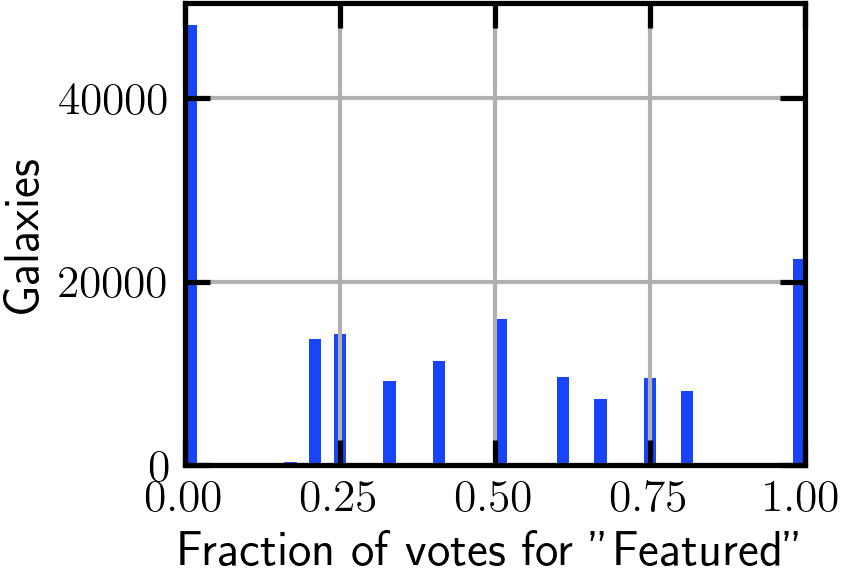

In [113]:
aggregated['smooth-or-featured_featured-or-disk_fraction'].hist(bins=50)
plt.xlabel('Fraction of votes for "Featured"')
plt.ylabel('Galaxies')

In [114]:
rare['value'].isna().sum()

0

In [115]:
rare['value'].value_counts()

value
[![no.png](https://panoptes-uploads.zooniverse.org/production/project_attached_image/096879e1-12ae-4df8-abb8-d4a93bc7797f.png =35x) Nothing Unusual]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [116]:
len(rare)

874182

In [117]:
rare

,task,task_label,value,id_str,user_id,classification_id,created_at,subject_ids
0,T10,Do you see any of these rare features?,[![no.png](https://panoptes-uploads.zooniverse...,bb9c2a3aab7b48ac9c21b7d6c781d062342ed8f2dd4145...,290475,575637319,2024-08-01 12:31:20+00:00,101103135
1,T10,Do you see any of these rare features?,[![irregular.png](https://panoptes-uploads.zoo...,98fe3b6effab15604e484d80ef47bb7a6cb310a2c12e11...,290475,575637443,2024-08-01 12:33:05+00:00,101101075
2,T10,Do you see any of these rare features?,[![no.png](https://panoptes-uploads.zooniverse...,18b6d8c9f5df1c44366b2a3b5ff0b1d9b3e986dd01fb73...,2403423,575637955,2024-08-01 12:38:36+00:00,101093977
4,T10,Do you see any of these rare features?,[![overlapping.png](https://panoptes-uploads.z...,c52a8096a07e5a8af5339408267172ebcab0041a802d28...,005c57be166317e1f905,575640326,2024-08-01 12:55:02+00:00,101086153
5,T10,Do you see any of these rare features?,[![no.png](https://panoptes-uploads.zooniverse...,9cca18309a2cf193367e3f20830c7970b8b1a501b62d41...,92b32ddb829852c7b75e,575640565,2024-08-01 12:57:33+00:00,101091604
...,...,...,...,...,...,...,...,...
1046418,T10,Do you see any of these rare features?,[![no.png](https://panoptes-uploads.zooniverse...,f6c7c2cd0ff99d9a6ad9e9d87f4568fd7c2b8251f3af5a...,842168,625861354,2025-03-26 15:56:38+00:00,101518607
1046419,T10,Do you see any of these rare features?,[![no.png](https://panoptes-uploads.zooniverse...,62e76e3b023f81b5327a82b9195670e5f73298619667e9...,842168,625861632,2025-03-26 15:57:19+00:00,101518531
1046420,T10,Do you see any of these rare features?,[![no.png](https://panoptes-uploads.zooniverse...,77c3dbd37af827c210e5434374fe6682ede43fb3d21ecb...,2082107,627520987,2025-04-02 09:48:04+00:00,101519023
1046421,T10,Do you see any of these rare features?,[![no.png](https://panoptes-uploads.zooniverse...,6f3c4bc3ec03ced61f0deb818749575409883e471cc308...,2082107,627521019,2025-04-02 09:48:20+00:00,101518414


In [118]:
# explode *again* to unpack the list in value
# rare.set_index('classification_id', inplace=True)
rare_exploded = rare.explode(['value'])  # df method preserves index
rare_exploded

,task,task_label,value,id_str,user_id,classification_id,created_at,subject_ids
0,T10,Do you see any of these rare features?,![no.png](https://panoptes-uploads.zooniverse....,bb9c2a3aab7b48ac9c21b7d6c781d062342ed8f2dd4145...,290475,575637319,2024-08-01 12:31:20+00:00,101103135
1,T10,Do you see any of these rare features?,![irregular.png](https://panoptes-uploads.zoon...,98fe3b6effab15604e484d80ef47bb7a6cb310a2c12e11...,290475,575637443,2024-08-01 12:33:05+00:00,101101075
2,T10,Do you see any of these rare features?,![no.png](https://panoptes-uploads.zooniverse....,18b6d8c9f5df1c44366b2a3b5ff0b1d9b3e986dd01fb73...,2403423,575637955,2024-08-01 12:38:36+00:00,101093977
4,T10,Do you see any of these rare features?,![overlapping.png](https://panoptes-uploads.zo...,c52a8096a07e5a8af5339408267172ebcab0041a802d28...,005c57be166317e1f905,575640326,2024-08-01 12:55:02+00:00,101086153
5,T10,Do you see any of these rare features?,![no.png](https://panoptes-uploads.zooniverse....,9cca18309a2cf193367e3f20830c7970b8b1a501b62d41...,92b32ddb829852c7b75e,575640565,2024-08-01 12:57:33+00:00,101091604
...,...,...,...,...,...,...,...,...
1046418,T10,Do you see any of these rare features?,![no.png](https://panoptes-uploads.zooniverse....,f6c7c2cd0ff99d9a6ad9e9d87f4568fd7c2b8251f3af5a...,842168,625861354,2025-03-26 15:56:38+00:00,101518607
1046419,T10,Do you see any of these rare features?,![no.png](https://panoptes-uploads.zooniverse....,62e76e3b023f81b5327a82b9195670e5f73298619667e9...,842168,625861632,2025-03-26 15:57:19+00:00,101518531
1046420,T10,Do you see any of these rare features?,![no.png](https://panoptes-uploads.zooniverse....,77c3dbd37af827c210e5434374fe6682ede43fb3d21ecb...,2082107,627520987,2025-04-02 09:48:04+00:00,101519023
1046421,T10,Do you see any of these rare features?,![no.png](https://panoptes-uploads.zooniverse....,6f3c4bc3ec03ced61f0deb818749575409883e471cc308...,2082107,627521019,2025-04-02 09:48:20+00:00,101518414


In [119]:
rare_exploded['value'] = rare_exploded['value'].apply(export_to_responses.sanitise_string)

In [120]:
rare_exploded['value'].value_counts()

value
nothing unusual    637676
something else      66989
overlapping         61343
irregular           52988
ring                45904
dust lane           34036
lens or arc         24819
Name: count, dtype: int64

In [121]:
rare_exploded['value'] = rare_exploded['value'].str.replace(' ', '_')

In [122]:
rare_pivoted = rare_exploded.pivot_table(index='id_str', columns='value', aggfunc='size', fill_value=0).reset_index()
rare_pivoted

value,id_str,dust_lane,irregular,lens_or_arc,nothing_unusual,overlapping,ring,something_else
0,000025c0749f53d1109ce125cc55d436ab993c64189836...,0,1,0,3,1,0,0
1,00004bc75b7f464e31bb5a9bbb348f3d453393a9b2f6cf...,0,0,0,1,0,0,0
2,0000a505e575fb99b9f1357a61eb7fa85a6358fba4e60f...,0,0,0,4,0,0,1
3,0001f11aa1a8f96f1d21f72d03ebc113d680a99d884d71...,1,0,0,3,0,0,0
4,0001f34234e796b75e3c5ecc529d2d07ef0571a522e1ba...,1,0,0,2,1,0,0
...,...,...,...,...,...,...,...,...
173555,fffdc840e17b15709c073c32d85228be00c8ab97591248...,0,0,0,1,0,0,0
173556,fffe5be14688312bb37c33083b5c558fab29e043a6cb1a...,0,0,0,5,0,0,0
173557,fffea0097b1f56d485fba0d9f82ca9b7518c50ac387986...,0,0,0,3,0,0,2
173558,ffff515b519b3e4cce85131e20d33aa955bfcda496c9b5...,0,0,0,5,0,0,0


In [123]:
rare_answers = rare_pivoted.columns[1:]
rare_answers

Index(['dust_lane', 'irregular', 'lens_or_arc', 'nothing_unusual',
       'overlapping', 'ring', 'something_else'],
      dtype='object', name='value')

In [124]:
rare_merged = pd.merge(aggregated, rare_pivoted, on='id_str', how='inner', validate='one_to_one')
rare_merged

,id_str,smooth-or-featured_smooth,smooth-or-featured_featured-or-disk,smooth-or-featured_problem,how-rounded_round,how-rounded_in-between,how-rounded_cigar-shaped,disk-edge-on_yes,disk-edge-on_no,edge-on-bulge_rounded,...,artifact_other_fraction,artifact_ghost_fraction,subject_id,dust_lane,irregular,lens_or_arc,nothing_unusual,overlapping,ring,something_else
0,000025c0749f53d1109ce125cc55d436ab993c64189836...,2,3,0,0,2,0,0,3,0,...,0.0,0.0,101552209,0,1,0,3,1,0,0
1,00004bc75b7f464e31bb5a9bbb348f3d453393a9b2f6cf...,0,1,3,0,0,0,1,0,0,...,0.0,0.0,101564291,0,0,0,1,0,0,0
2,0000a505e575fb99b9f1357a61eb7fa85a6358fba4e60f...,1,1,0,1,0,0,0,1,0,...,0.0,0.0,101084770,0,0,0,4,0,0,1
3,0001f11aa1a8f96f1d21f72d03ebc113d680a99d884d71...,1,3,0,0,0,1,3,0,1,...,0.0,0.0,101719490,1,0,0,3,0,0,0
4,0001f34234e796b75e3c5ecc529d2d07ef0571a522e1ba...,2,2,0,2,0,0,0,2,0,...,0.0,0.0,101672698,1,0,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169588,fffdc840e17b15709c073c32d85228be00c8ab97591248...,1,0,4,0,1,0,0,0,0,...,0.0,0.0,101736077,0,0,0,1,0,0,0
169589,fffe5be14688312bb37c33083b5c558fab29e043a6cb1a...,0,2,0,0,0,0,0,2,0,...,0.0,0.0,101084827,0,0,0,5,0,0,0
169590,fffea0097b1f56d485fba0d9f82ca9b7518c50ac387986...,0,5,0,0,0,0,0,5,0,...,0.0,0.0,101606321,0,0,0,3,0,0,2
169591,ffff515b519b3e4cce85131e20d33aa955bfcda496c9b5...,2,1,0,2,0,0,0,1,0,...,0.0,0.0,101117763,0,0,0,5,0,0,0


In [125]:
for col in rare_answers:
    rare_merged[col + '_fraction'] = rare_merged[col] / rare_merged['smooth-or-featured_total-votes']

In [126]:
rare_merged.to_csv(aggregated_loc.replace('.csv', '_with_rare.csv'), index=False)

In [127]:
rare_merged[rare_merged['smooth-or-featured_total-votes'] > 4].sort_values('lens_or_arc_fraction', ascending=False)

,id_str,smooth-or-featured_smooth,smooth-or-featured_featured-or-disk,smooth-or-featured_problem,how-rounded_round,how-rounded_in-between,how-rounded_cigar-shaped,disk-edge-on_yes,disk-edge-on_no,edge-on-bulge_rounded,...,overlapping,ring,something_else,dust_lane_fraction,irregular_fraction,lens_or_arc_fraction,nothing_unusual_fraction,overlapping_fraction,ring_fraction,something_else_fraction
36131,36cbdd3c616a0d002aeb79a9711b4bc47f24cf2a05d637...,3,2,0,3,0,0,0,2,0,...,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
66524,649b1f2aac697507994e904645fee0c931974882736909...,3,2,0,3,0,0,0,2,0,...,0,1,1,0.0,0.0,1.0,0.0,0.0,0.2,0.2
79564,77fa7b649eb8d8dc94a63a53fef049d2de1344b018d2a5...,4,1,0,4,0,0,0,1,0,...,1,0,0,0.0,0.0,1.0,0.0,0.2,0.0,0.0
161315,f3a293fe4d2a3728d17fe22dd5297d94e1bf78b097e16f...,1,4,0,0,1,0,0,4,0,...,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
139155,d224c1c7b33aeffa6de5d26491f02003b34dc43c763ae8...,3,2,0,1,2,0,0,2,0,...,1,2,0,0.0,0.0,0.8,0.2,0.2,0.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61035,5c5dfd9080cb214f9b16b1f0951ba1162baf61bc20818f...,3,1,1,0,3,0,0,1,0,...,0,0,0,0.0,0.0,0.0,0.8,0.0,0.0,0.0
61042,5c5fa8d7db9d9d50eb9e1c0a7afa6546333850ef0be875...,5,1,0,5,0,0,0,1,0,...,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
61046,5c60c737c61d8d40bb1730bfa839d793f19a0be56db0d2...,2,1,2,2,0,0,0,1,0,...,0,0,2,0.0,0.0,0.0,0.2,0.0,0.0,0.4
61048,5c62857dfdc0fae781b6cda809028b64563de75013beef...,4,1,0,0,4,0,0,1,0,...,1,0,0,0.0,0.4,0.0,0.4,0.2,0.0,0.0


In [128]:
# tweak catalog to include renamed columns in format {question}-cd_{answer} expected by zoobot ortho schema

from zoobot.shared.schemas import euclid_ortho_schema

aggregated = pd.read_csv(aggregated_loc)

renamer = {}
for question in euclid_ortho_schema.questions:
  renamer[question.text.replace('-euclid', '') + '_total-votes'] = question.text + '_total-votes'
  for answer in question.answers:
    renamer[answer.text.replace('-euclid', '')] = answer.text
    renamer[answer.text.replace('-euclid', '') + '_fraction'] = answer.text + '_fraction'
# print(renamer)
aggregated = aggregated.rename(columns=renamer)

for label_col in euclid_ortho_schema.label_cols:
  assert label_col in aggregated.columns.values, 'Missing {}'.format(label_col)

aggregated.to_csv(aggregated_loc.replace('.csv', '_ortho.csv'), index=False)
